# Laboratorio 3

# Parte 1: Numpy:

In [ ]:
import numpy as np


#### 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [ ]:
array_booleano = np.zeros(1000, dtype=bool)
tamaño_bytes = array_booleano.nbytes
print("El tamaño en bytes del array de 1000 elementos booleanos es:", tamaño_bytes)

#### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [ ]:
array_pares = np.arange(100, 0, -2)
ultimos_10 = array_pares[-10:]
print("Los últimos 10 enteros pares en orden decreciente son:", ultimos_10)

#### 3) Dado el array
[2 4 5 6

0 3 7 4

8 8 5 2

1 5 6 1]

In [ ]:
array = np.array([[2, 4, 5, 6],
                  [0, 3, 7, 4],
                  [8, 8, 5, 2],
                  [1, 5, 6, 1]])

Seleccione con una instrucción el subarray de elementos 0 3 7 4

In [ ]:
subarray1 = array[1:3, 0:2]
print("Subarray de elementos 0 3 7 4:")
print(subarray1)

Después, seleccione el subarray de elementos
2 5
8 5

In [ ]:
subarray2 = array[[0, 2], 0:3:2]
print("Subarray de elementos 2 5 8 5:")
print(subarray2)

#### 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [ ]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

diferencia = a - b
media_diferencia = np.mean(diferencia)
print("La media aritmética de la diferencia (a-b) es:", media_diferencia)

#### 5) Tengo valores de cordenadas (x, y) en las columnas del array
1.33    4.5

30.0    10.7

70.2    0.5

Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [ ]:
coordenadas = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

nuevas_coordenadas = np.array([[37.1, -3.6]])

array_actualizado = np.vstack((coordenadas, nuevas_coordenadas))
dimensiones = array_actualizado.shape
print("Las dimensiones del nuevo array son:", dimensiones)

#### 6) Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [ ]:
copia_array = array_actualizado.copy()

nuevas_coordenadas2 = np.array([[10.8, 3.0],
                                [35.8, 12.0]])

# Agregar nuevas coordenadas al array copiado
array_extendido = np.vstack((copia_array, nuevas_coordenadas2))

# Transponer el array extendido
array_traspuesto = array_extendido.T

print("El array traspuesto con las nuevas coordenadas es:")
print(array_traspuesto)

# Parte 2: Exploración y Minería de Datos:

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [56]:
import pandas as pd

df = pd.read_csv('NucleosPoblacion.csv')

1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [57]:
municipios_mas_100k = df[df['Poblacion'] > 100000].shape[0]
print(f'Municipios con más de 100,000 habitantes: {municipios_mas_100k}')

Municipios con más de 100,000 habitantes: 62


2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
    a. ¿Cuál es la segunda ciudad más poblada?
    b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

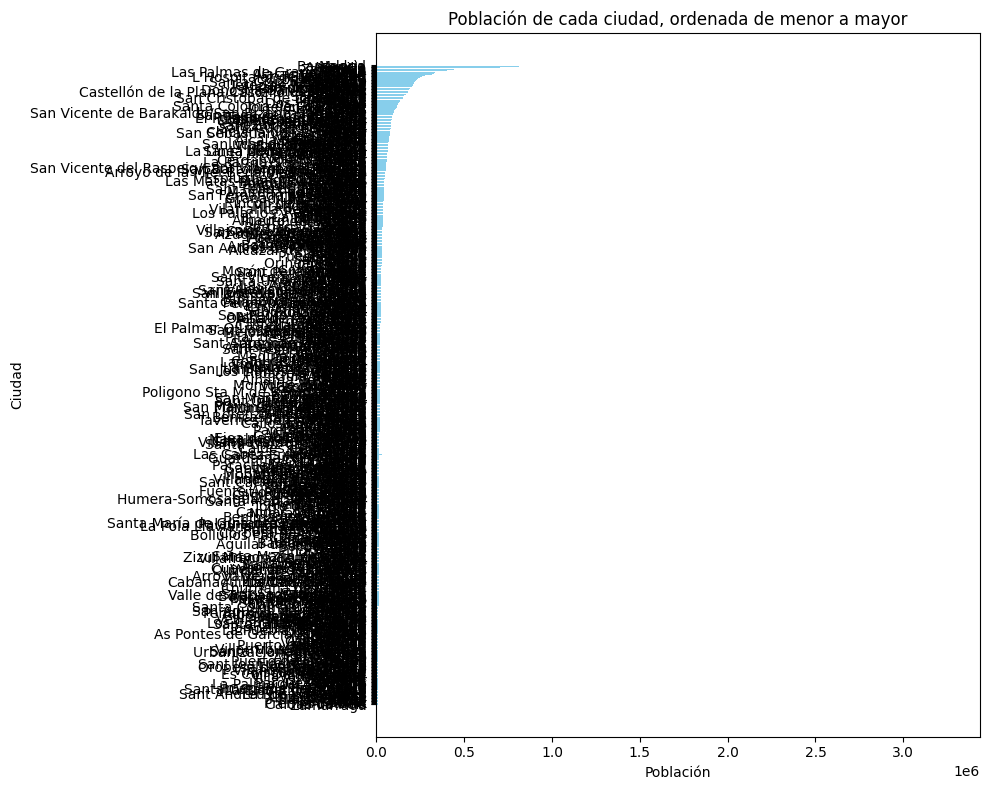

Segunda ciudad más poblada: Barcelona
Posición de Granada: 273


In [58]:
import matplotlib.pyplot as plt

df_ordenado = df.sort_values('Poblacion')
plt.figure(figsize=(10, 8))
plt.barh(df_ordenado['Texto'], df_ordenado['Poblacion'], color='skyblue')
plt.xlabel('Población')
plt.ylabel('Ciudad')
plt.title('Población de cada ciudad, ordenada de menor a mayor')
plt.tight_layout()
plt.show()

# Identificar la segunda ciudad más poblada y la posición de Granada
segunda_mas_poblada = df_ordenado['Texto'].iloc[-2]
posicion_granada = df_ordenado[df_ordenado['Texto'].str.contains('Granada', case=False)].index.tolist()[0] + 1
print(f'Segunda ciudad más poblada: {segunda_mas_poblada}')
print(f'Posición de Granada: {posicion_granada}')

3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [59]:
municipios_extremadura_5k = df[(df['Poblacion'] > 5000) & (df['Provincia'].str.contains('Badajoz|Cáceres'))].shape[0]
print(f'Municipios de Extremadura con más de 5,000 habitantes: {municipios_extremadura_5k}')

Municipios de Extremadura con más de 5,000 habitantes: 14


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [60]:
municipio_norte = df.loc[df['Y'].idxmax(), ['Texto', 'Provincia', 'Poblacion']]
print(f'Municipio más al norte: {municipio_norte["Texto"]} en {municipio_norte["Provincia"]} con {municipio_norte["Poblacion"]} habitantes')

Municipio más al norte: Viveiro en Lugo con 16211.0 habitantes


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [61]:
granada_stats = df[df['Provincia'] == 'Granada']['Poblacion'].describe()
print(f'Media: {granada_stats["mean"]}\nMediana: {granada_stats["50%"]}\nDesviación estándar: {granada_stats["std"]}\nValor máximo: {granada_stats["max"]}\nValor mínimo: {granada_stats["min"]}')

Media: 30217.85
Mediana: 17526.0
Desviación estándar: 50355.49171459276
Valor máximo: 239154.0
Valor mínimo: 10386.0


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

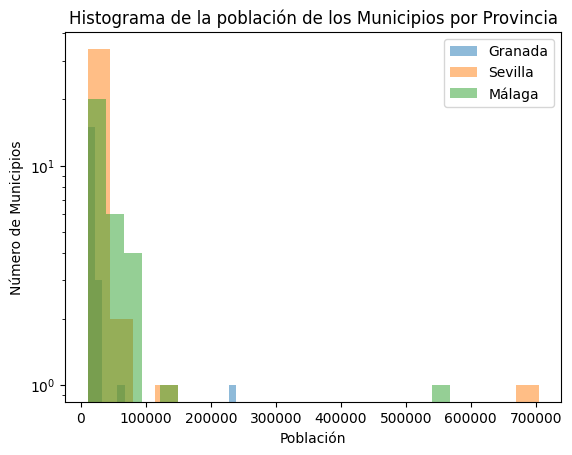

In [62]:
# Seleccionar algunas provincias para simplificar la visualización, o ajustar para incluir todas
provincias_seleccionadas = ['Granada', 'Sevilla', 'Málaga']  # Ejemplo con tres provincias
for provincia in provincias_seleccionadas:
    poblacion_provincia = df[df['Provincia'] == provincia]['Poblacion']
    plt.hist(poblacion_provincia, bins=20, alpha=0.5, label=provincia)

plt.xlabel('Población')
plt.ylabel('Número de Municipios')
plt.title('Histograma de la población de los Municipios por Provincia')
plt.legend()
plt.yscale('log')
plt.show()

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [63]:
municipios_aleatorios = df.sample(50)
promedio_poblacion = municipios_aleatorios['Poblacion'].mean()
desviacion_estandar_poblacion = municipios_aleatorios['Poblacion'].std()
print(f'Promedio de población: {promedio_poblacion}\nDesviación estándar: {desviacion_estandar_poblacion}')

Promedio de población: 43572.98
Desviación estándar: 96094.0531954512


8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [66]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calcula la distancia en kilómetros entre dos puntos geográficos dados por su longitud y latitud en grados decimales.
    """
    # Convertir coordenadas de grados a radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Diferencia de coordenadas
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Fórmula de Haversine
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radio de la Tierra en kilómetros
    return c * r

# Coordenadas de Madrid
madrid_lon, madrid_lat = df[df['Texto'] == 'Madrid'][['X', 'Y']].values[0]

# Calcula la distancia de cada municipio a Madrid
df['Distancia_a_Madrid'] = df.apply(lambda row: haversine(madrid_lon, madrid_lat, row['X'], row['Y']), axis=1)

# Municipio más cercano y más lejano a Madrid
municipio_mas_cercano = df.loc[df['Distancia_a_Madrid'].idxmin()]
municipio_mas_lejano = df.loc[df['Distancia_a_Madrid'].idxmax()]

print(f"Municipio más cercano a Madrid: {municipio_mas_cercano['Texto']} a {municipio_mas_cercano['Distancia_a_Madrid']} km")
print(f"Municipio más lejano a Madrid: {municipio_mas_lejano['Texto']} a {municipio_mas_lejano['Distancia_a_Madrid']} km")

Municipio más cercano a Madrid: Madrid a 0.0 km
Municipio más lejano a Madrid: Los Llanos de Aridane a 1840.222636357344 km
